# Wheat and chess board problem

Similar to the rice story of Soroshi Shinzaemon, there is the story of wheat and chess board. With this as a theme, we will familiarize ourselves with the use of NumPy , a numerical library for handling multi-dimensional arrays.

If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?

[Wheat and chessboard problem-Wikipedia (Last viewed: May 31, 2019)](https://en.wikipedia.org/wiki/Wheat_and_chessboard_problem)

The problem is to find the final number of wheat grains on an 8x8 chessboard by placing them in the order 1, 2, 4.

First, consider arranging the wheat grains on a 4 square plate. One element of the array (list) is regarded as one cell.

You can use a Python list and a for statement to do the following:

In [2]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]


In [11]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


# [Problem 1] Number of wheat on a 2 x 2 square chess board

Represent a 2 x 2 square chessboard by ndarray and calculate the number of wheat in each square. After placing one wheat on the upper left square, proceed to two to the right, four to the lower left, and eight to the lower right.

Please modify the shape of the ndarray created with the sample code.

In [13]:
two_by_two=small_board_ndarray.reshape(2, 2)
print(two_by_two)

[[1 2]
 [4 8]]


# [Problem 2] Expansion to n × m mass
Create a function that returns a ndarray containing the number of wheat on an nxm chess board. Then use this function to find the number of wheat on the 8x8 square chess board.

In [66]:
import numpy as np
import sys
def nXm(n,m):
    squares=n*m
    sum_wheat=2**(n*m)
    last_square=[1]
    counter=1
    while counter<(squares):
        last_square.append(last_square[-1]*2)
        counter=counter+1
    board_ndarray = np.array(last_square)
    board_ndarray=board_ndarray.reshape(n, m)
    return board_ndarray, np.sum(board_ndarray)

print(nXm(8,8))

    

(array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
       [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
        1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
       [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
        2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
       [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
        6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
       [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
        1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
       [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
        4.50359963e+15, 9.00719925e+15, 1.80143985e+16, 3

# [Problem 3] Total number of wheat

Find the total number of wheat on a chess board of 8 x 8 squares. Also, find the average of each column and visualize it in a bar chart.


The total of wheat on a chess board of 8 x 8 squares is 1.8446744073709552e+19
[3.18750000e+01 8.16000000e+03 2.08896000e+06 5.34773760e+08
 1.36902083e+11 3.50469331e+13 8.97201488e+15 2.29683581e+18]
[ 1  2  3  3  4  5  6  7 10]


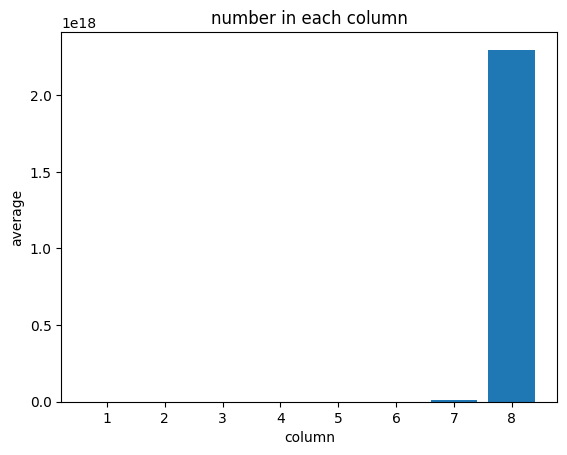

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
narrayBoard, sum_array = nXm(8, 8)
print("The total of wheat on a chess board of 8 x 8 squares is", sum_array)
plt.xlabel("column")
plt.ylabel("average")
plt.title("number in each column")
print(np.mean(narrayBoard,axis=1))
print(np.array([1, 2, 3,3,4,5,6,7,10]))
plt.bar(np.array([1,2,3,4,5,6,7,8]), np.mean(narrayBoard,axis=1))
plt.show()

# [Problem 4] Heat map of the number of wheat

Visualize the number of wheat on the 8x8 chess board as a heat map.

Sample code is prepared for the heat map.

<Heatmap sample code>

This is a 4-by-2 array of heat maps. Small values are purple and large values are yellow.

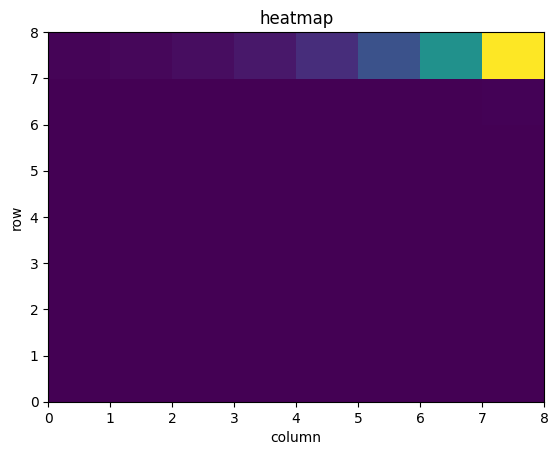

In [92]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(narrayBoard)
plt.show()

# The second half of the chess board
The American inventor Ray Kurzweil quoted this anecdote and coined the phrase "the second half of the chessboard. It tells us that technological progress may not have a noticeable impact on society in the beginning, but as it progresses, doubling and doubling, it will cause rapid changes when we reach the second half of the chessboard.



## [Problem 5] How many times is the second half as long as the first half?
Find how many times the number of wheat in the second half of the chessboard is greater than the number of wheat in the first half. The first half is lines 0 to 3 of the array, and the second half is lines 4 to 7.

In [97]:
first_half, second_half=np.vsplit(narrayBoard, 2)
sum_first_half=np.sum(first_half)
sum_second_half=np.sum(second_half)
print("Wheat quantity on the first half",sum_first_half)
print("Wheat quantity on the second half",sum_second_half)
print("The second half of the chessboard has",(sum_second_half/sum_first_half), "times, more wheat than the fisrt half")

Wheat quantity on the first half 4294967295.0
Wheat quantity on the second half 1.8446744069414584e+19
The second half of the chessboard has 4294967296.0 more wheat than the fisrt half


In [104]:
first_half #First half of the chessboard

array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
       [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
        1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
       [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
        2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09]])

In [105]:
second_half #Second half of the chessboard

array([[4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
        6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
       [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
        1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
       [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
        4.50359963e+15, 9.00719925e+15, 1.80143985e+16, 3.60287970e+16],
       [7.20575940e+16, 1.44115188e+17, 2.88230376e+17, 5.76460752e+17,
        1.15292150e+18, 2.30584301e+18, 4.61168602e+18, 9.22337204e+18]])

# [Problem 6] Expansion to n × m mass by another calculation method
Create a new function similar to Problem 2 that returns an ndarray containing the number of wheat squares on an n×m chessboard, one usingnp.append ()and one using broadcast.

Use those functions again to find the number of wheat on an 8x8 square chess board.



### Using np.append()

In [107]:
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


In [142]:
def appending(n=8,m=8):
    np.seterr(over='ignore')    
    initial_board_ndarray = np.array([1])
    initial_board_ndarray = initial_board_ndarray.astype('float64') 
    for _ in range((n*m) - 1):
        initial_board_ndarray = np.append(initial_board_ndarray, 2*initial_board_ndarray[-1])
    return initial_board_ndarray
print((appending().reshape([8, 8])))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

### Using broadcast

In [144]:
def broadcasting(n=8,m=8):
    np.seterr(over='ignore')    
    board_ndarray = np.array([1])
    n_squares = n*m
    indices_of_squares = np.arange(n_squares)
    board_ndarray = 2**indices_of_squares
    board_ndarray = board_ndarray.astype('float64') 
    board_ndarray[-1]=-board_ndarray[-1]
    return board_ndarray
print((broadcasting().reshape([8, 8])))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

# [Problem 7] Comparing calculation times
We've seen three different ways. Each calculation time of Jupyter Notebook %% timeitPlease measure using and compare and consider.

%% timeit Runs the code in the cell multiple times and outputs the average execution time.

In [138]:
%%timeit
broadcasting().reshape([8, 8])

7.54 μs ± 545 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [146]:
%%timeit
(appending().reshape([8, 8]))

304 μs ± 31.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [148]:
%%timeit
nXm(8,8)

23.9 μs ± 952 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
